# Chain-of-Thought training data

In [1]:
import random

import pandas
import torch
import math
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

plt.style.use("../figure.mplstyle")

In [2]:
results = pandas.read_csv("data/scratchpad_eval.csv")

Saved plot to ../latex/fig/scratchpad_eval.png


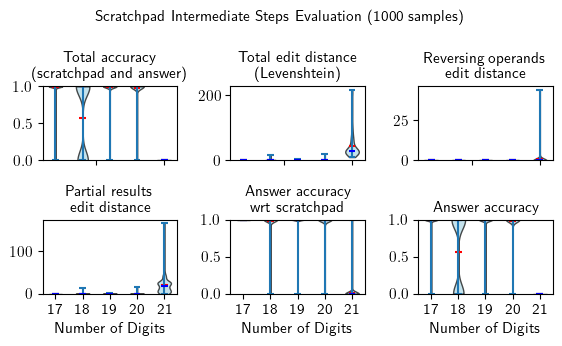

In [20]:
# Plot results
metrics = [
    "accuracy",
    "edit_dist",
    "reverse_edit_dist",
    "partials_edit_dist",
    "answer_accuracy_wrt_partials",
    "answer_accuracy",
    # "answer_edit_dist",
]
names = {
    "accuracy": "Total accuracy\n(scratchpad and answer)",
    "edit_dist": "Total edit distance\n(Levenshtein)",
    "reverse_edit_dist": "Reversing operands\nedit distance",
    "partials_edit_dist": "Partial results\nedit distance",
    "answer_accuracy_wrt_partials": "Answer accuracy\nwrt scratchpad",
    "answer_accuracy": "Answer accuracy",
    # "answer_edit_dist": "Answer edit distance",
}

n_samples = 1000

total_plots = len(metrics)
nrows = 2
ncols = math.ceil(total_plots / 2)
scale = 3
fig, axs = plt.subplots(nrows, ncols, figsize=(5.8, 3.5))

axs = axs.flatten()

# plot metrics
for i, metric in enumerate(metrics):
    sorted_n_digits = sorted(results["n_digits"].unique())
    grouped_data = [
        results[results["n_digits"] == n_digits][metric].values
        for n_digits in sorted_n_digits
    ]

    parts = axs[i].violinplot(
        grouped_data, showmeans=True, showextrema=True, showmedians=True
    )

    for pc in parts["bodies"]:
        pc.set_facecolor("lightblue")
        pc.set_edgecolor("black")
        pc.set_alpha(0.7)

    parts["cmeans"].set_color("red")
    parts["cmedians"].set_color("blue")

    # axs[i].set_ylabel(names[metric])
    axs[i].set_title(names[metric])

    if i < 3:
        axs[i].set_xticklabels([])
        axs[i].set_xlabel("")
    else:
        axs[i].set_xlabel("Number of Digits")
        axs[i].set_xticks(range(1, len(grouped_data) + 1))
        axs[i].set_xticklabels(sorted_n_digits)

    if "accuracy" in metric:
        axs[i].set_ylim(0, 1)
    else:
        axs[i].set_ylim(0, None)

# plot accuracy vs carry ratio as scatter plot
# data = results[results["answer_accuracy"] != -1]
# axs[-1].scatter(data["carry_ratio"], data["answer_accuracy"], alpha=0.5)
# axs[-1].set_xlabel("Carry Ratio")
# axs[-1].set_ylabel("Answer Accuracy")
# axs[-1].set_title("Answer Accuracy vs Carry Ratio")

fig.suptitle(f"Scratchpad Intermediate Steps Evaluation ({n_samples} samples)")

plt.subplots_adjust(wspace=0.5)

fig.tight_layout()
fig_path = "../latex/fig/scratchpad_eval.png"
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
print(f"Saved plot to {fig_path}")